# **Business Problem** : Your Employer runs an Internet Commerce Company.He wants you cluster his Customers so that He can cater to their needs in a better and Efficient way.You have been given a Dataset containg the details of Customers and their Purchases to form Categories among Customers according to their Features

**1.Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**2.Importing Dataset**

In [2]:
dataset = pd.read_csv('Cluster.csv')

**3.Preliminary Analysis and Missing value Detection & Rectification**

In [3]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
dataset.shape

(10999, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
dataset.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Since there are no Missing values , Lets move on

In [7]:
dataset.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [8]:
dataset.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

Since We don't need the Customer Id for Clustering , Lets remove them.

In [9]:
df = dataset.iloc[:,1:]
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


**4.Exploratary Analysis on the Variables**

Warehouse Block

In [10]:
df.Warehouse_block.value_counts()

F    3666
D    1834
B    1833
C    1833
A    1833
Name: Warehouse_block, dtype: int64

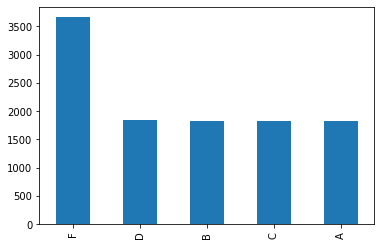

In [11]:
df.Warehouse_block.value_counts().plot(kind="bar")

Mode of Shipment

In [12]:
df.Mode_of_Shipment.value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

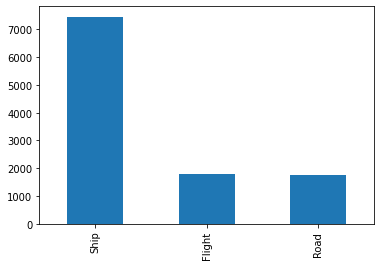

In [13]:
df.Mode_of_Shipment.value_counts().plot(kind="bar")

Customer care Calls

In [14]:
df.Customer_care_calls.value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

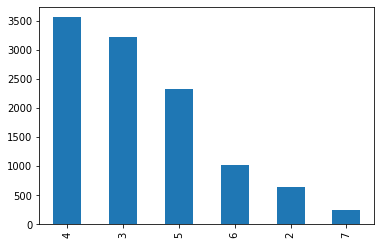

In [15]:
df.Customer_care_calls.value_counts().plot(kind="bar")

Customer Ratings

In [16]:
df.Customer_rating.value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

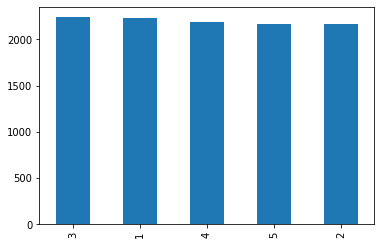

In [17]:
df.Customer_rating.value_counts().plot(kind="bar")

Prior Purchases

In [18]:
df.Prior_purchases.value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

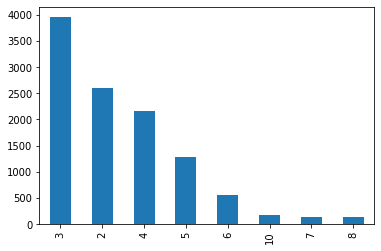

In [19]:
df.Prior_purchases.value_counts().plot(kind="bar")

Product Importance

In [20]:
df.Product_importance.value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

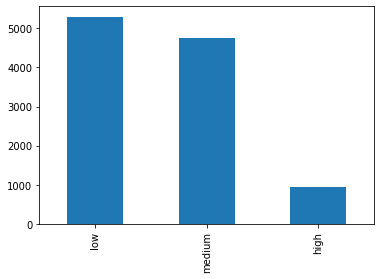

In [21]:
df.Product_importance.value_counts().plot(kind="bar")

Gender

In [22]:
df.Gender.value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

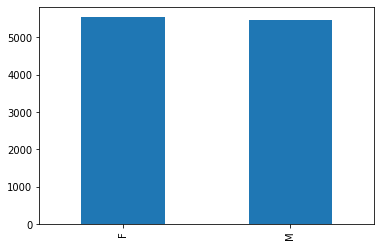

In [23]:
df.Gender.value_counts().plot(kind="bar")

Reached on Time

In [24]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

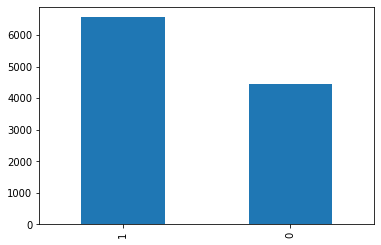

In [25]:
df['Reached.on.Time_Y.N'].value_counts().plot(kind="bar")

**5.Encoding Categorical Variables**

In [26]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,6])],remainder='passthrough')
df = ct.fit_transform(df)

In [28]:
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,177.0,3.0,0.0,44.0,1233.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,216.0,2.0,1.0,59.0,3088.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,183.0,4.0,1.0,48.0,3374.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,176.0,4.0,1.0,10.0,1177.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,184.0,3.0,0.0,46.0,2484.0,1.0


**6.Using the elbow method to find the optimal number of clusters**

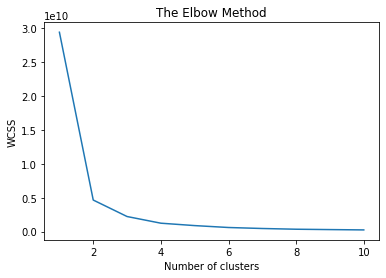

In [29]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the Above Graph , 3 looks like an Optimal Value for the number of Clusters.Because after 3 , Within Cluster Sum Square (WCSS) starts to flatten up

**7.Training the K-Means Clustering model on the dataset**

We are choosing K-means++ Algorithm inorder to avoid the K-means Random Initialization Trap.

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

**8.Visualizing the Cluster**

In [31]:
dataset = dataset.assign(Cluster = y_kmeans)

In [32]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cluster
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,0
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,2
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,2
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,0


In [33]:
dataset['Cluster'].value_counts()

0    4021
1    3794
2    3184
Name: Cluster, dtype: int64

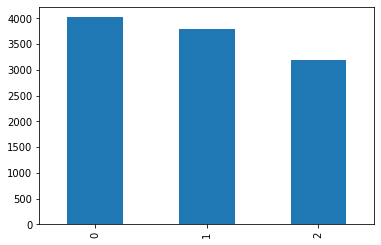

In [34]:
dataset['Cluster'].value_counts().plot(kind="bar")

**Looks like k = 3 Clusters is the optimal Number of Clusters** [note:I did try k = 4 , but only 3 Clusters were filled and the Fourth cluster had less than half of data points of other clusters]